# The very best challenge like no one ever was!

# Notebook di training

In [1]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_path = "./train.csv"
test_path = "./test.csv"
pokemons_path = "./pokemon.csv"

pokemon_data = pd.read_csv(pokemons_path)

### Una preparazione della tabella di lookup
Nel notebook di preparazione abbiamo visto che un Pokémon è definito da 12 attributi.
L'id ci servirà solamente per il lookup. Il nome possiamo intuire già ora che non influisce sugli esiti delle battaglie. Ciò che conta di più sono i tipi e le 6 statistiche. Il numero di generazione non dovrebbe influire sull'esito della battaglia, tutte le generazioni hanno Pokémon forti e Pokémon deboli. Un Pokémon leggendario è solitamente più forte dei Pokémon non leggendari, ma probabilmente riusciremo ad omettere questa feature in quanto la "leggendarietà" è correlata alla somma delle statistiche

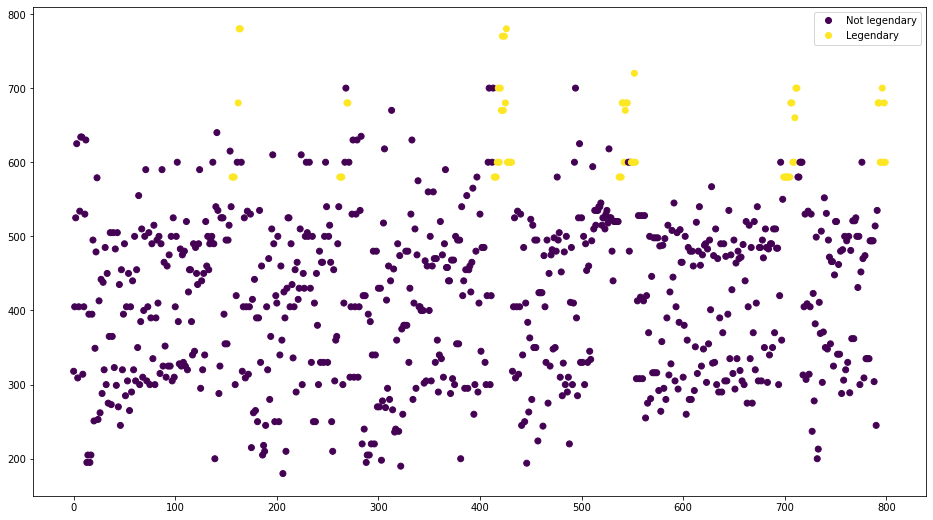

In [4]:
legendary = pd.DataFrame()
legendary["Stats"] = pokemon_data.iloc[:, 4:10].sum(axis=1)
legendary["Legendary"] = pokemon_data["Legendary"]
legendary["Generation"] = pokemon_data["Generation"]
plt.figure(figsize=(16, 9))
scatter = plt.scatter(legendary.index, legendary["Stats"], c=legendary["Legendary"])
plt.legend(handles=scatter.legend_elements()[0], labels=["Not legendary", "Legendary"])
plt.show()

Proprio come ci aspettavamo: i Pokémon leggendari hanno una somma di statistiche superiore

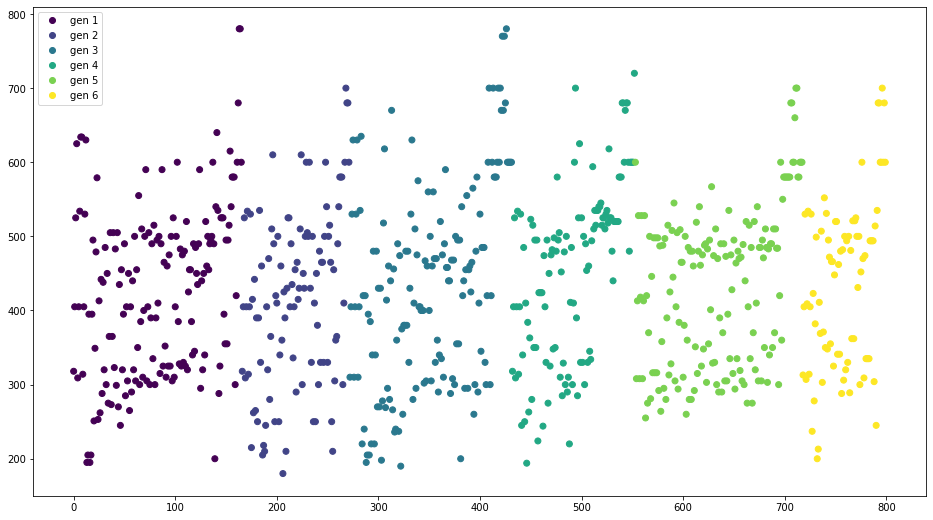

In [5]:
plt.figure(figsize=(16, 9))
scatter = plt.scatter(legendary.index, legendary["Stats"], c=legendary["Generation"])
plt.legend(handles=scatter.legend_elements()[0], labels=["gen {}".format(i) for i in range(1,7)])
plt.show()

Anche qui è come ipotizzavamo: ogni generazione ha Pokémon forti e Pokémon deboli, distribuiti ugualmente per ogni generazione.  
Pertanto la generazione non influisce sull'esito della battaglia

Possiamo quindi estrarre le colonne rilevanti dalla tabella di lookup

In [6]:
features = ["#", "Type 1", "Type 2", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
pokemon_data = pokemon_data[features]

## I Tipi
I tipi dei Pokémon sono features categoriche. In totale sono 18, ognuno ha efficacia o debolezza sugli altri.
Ogni Pokémon può avere al massimo 2 tipi (questo vuol dire che aumentano le combinazioni di debolezza/efficacia, ma noi non siamo qui in veste di programmatori della battaglia ma solo in quanto analisti quindi non ci interessano questi dettagli).  
Il modo migliore di rappresentare un Pokémon è usare valori numerici per le statistiche e una matrice binaria per i tipi. Quindi ogni riga della tabella di lookup avrà valore = 1 in un tipo (o in 2 tipi) e 0 in tutti gli altri

In [7]:
pokemon_data["Type 1"] = pokemon_data["Type 1"].astype("str")
pokemon_data["Type 2"] = pokemon_data["Type 2"].astype("str")
types1 = pd.get_dummies(pokemon_data["Type 1"])
types2 = pd.get_dummies(pokemon_data["Type 2"])
types = types1 + types2
types = types.drop(columns=["nan"])
types.head(10)

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
pokemon_data = pokemon_data.drop(columns=["Type 1", "Type 2"])

In [9]:
for col in types.columns:
    pokemon_data[col] = types[col]

In [10]:
pokemon_data

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Bug,Dark,Dragon,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,45,49,49,65,65,45,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2,60,62,63,80,80,60,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,3,80,82,83,100,100,80,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,4,80,100,123,122,120,80,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,5,39,52,43,60,50,65,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,50,100,150,100,150,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
796,797,50,160,110,160,110,110,0,0,0,...,0,0,0,0,0,0,0,1,0,0
797,798,80,110,60,150,130,70,0,0,0,...,1,0,0,0,0,0,1,0,0,0
798,799,80,160,60,170,130,80,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
types_names = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water']
stats_names = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

Normalizziamo i valori delle statistiche

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pokemon_data[stats_names] = scaler.fit_transform(pokemon_data[stats_names])
pokemon_data.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Bug,Dark,Dragon,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,3,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,4,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,5,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creiamo la nostra tabella di lookup come prodotto cartesiano della tabella con sè stessa, per avere tutti i possibili accoppiamenti tra Pokémon

In [13]:
first_columns_names = []
second_columns_names = []
first_columns_names = ["{}1".format(row) for row in pokemon_data.columns]
second_columns_names = ["{}2".format(row) for row in pokemon_data.columns]
pokemon_data.columns

Index(['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Bug',
       'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying',
       'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic',
       'Rock', 'Steel', 'Water'],
      dtype='object')

In [14]:
train_data = pd.read_csv(train_path)
first_pokemon_data = pd.DataFrame(data=pokemon_data, copy=True)
first_pokemon_data.columns=first_columns_names
second_pokemon_data = pd.DataFrame(data=pokemon_data, copy=True)
second_pokemon_data.columns=second_columns_names

In [15]:
cross_pokemon_data = first_pokemon_data.merge(second_pokemon_data, how="cross")

Quando due Pokémon lottano competono sulle loro statistiche. Un Pokémon con un buon attacco probabilmente vincerà contro un Pokémon con scarsa difesa.  
Quindi possiamo utilizzare per il training la differenza tra le statistiche del primo e del secondo pokemon

In [16]:
cross_pokemon_data["id"] = cross_pokemon_data["#1"].astype("str") + "-" + cross_pokemon_data["#2"].astype("str")
cross_pokemon_data

,#1,HP1,Attack1,Defense1,Sp. Atk1,Sp. Def1,Speed1,Bug1,Dark1,Dragon1,...,Grass2,Ground2,Ice2,Normal2,Poison2,Psychic2,Rock2,Steel2,Water2,id
0,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,1,0,0,0,1,0,0,0,0,1-1
1,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,1,0,0,0,1,0,0,0,0,1-2
2,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,1,0,0,0,1,0,0,0,0,1-3
3,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,1,0,0,0,1,0,0,0,0,1-4
4,1,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,0,0,0,0,0,0,1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639995,800,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310,0,0,0,...,0,0,0,0,0,0,1,0,0,800-796
639996,800,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310,0,0,0,...,0,0,0,0,0,0,1,0,0,800-797
639997,800,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310,0,0,0,...,0,0,0,0,0,1,0,0,0,800-798
639998,800,0.420917,0.955658,1.481116,1.748526,0.650720,0.059310,0,0,0,...,0,0,0,0,0,1,0,0,0,800-799


Definiamo una funzione che carichi i dati e li prepari per il training

In [17]:
total_features = ['HP1', 'Attack1', 'Defense1', 'Sp. Atk1', 'Sp. Def1', 'Speed1',
       'Bug1', 'Dark1', 'Dragon1', 'Electric1', 'Fairy1', 'Fighting1', 'Fire1',
       'Flying1', 'Ghost1', 'Grass1', 'Ground1', 'Ice1', 'Normal1', 'Poison1',
       'Psychic1', 'Rock1', 'Steel1', 'Water1', 'HP2', 'Attack2',
       'Defense2', 'Sp. Atk2', 'Sp. Def2', 'Speed2', 'Bug2', 'Dark2',
       'Dragon2', 'Electric2', 'Fairy2', 'Fighting2', 'Fire2', 'Flying2',
       'Ghost2', 'Grass2', 'Ground2', 'Ice2', 'Normal2', 'Poison2', 'Psychic2',
       'Rock2', 'Steel2', 'Water2']

def load_data(path):
    data = pd.read_csv(path)
    #ci serve un target OneHot di lunghezza 2 (es. [0, 1] se è il secondo Pokémon a vincere)
    data["isFirst"] = data["Winner"] == data["Second_pokemon"]
    data["id"] = data["First_pokemon"].astype("str") + "-" + data["Second_pokemon"].astype("str")
    data= data.drop(columns=["First_pokemon", "Second_pokemon"]).merge(cross_pokemon_data, on="id")
    X = data[total_features].values
    y = pd.get_dummies(data["isFirst"]).values
    print("X shape: ", X.shape, "\n", "y shape: ", y.shape)
    return X, y

## Training time!

Ora che abbiamo i dati preprocessati possiamo addestrare la rete (non i Pokémon ahimé). Modelliamo una rete neurale utilizzando Keras

In [18]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [19]:
X_train, y_train = load_data(train_path) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=10, stratify=y_train)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

X shape:  (34000, 48) 
 y shape:  (34000, 2)
(25500, 48) (8500, 48) (25500, 2) (8500, 2)


In [20]:
in_dim = 48*2
hide_dim_1 = in_dim*3/2
hide_dim_2 = hide_dim_1*2/3
out_dim = 2


model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(in_dim, input_dim=48, activation="relu"),
  tf.keras.layers.Dense(hide_dim_1 ,activation='relu'),
  tf.keras.layers.Dense(hide_dim_2 ,activation='relu'),
  tf.keras.layers.Dense(out_dim)
])

model.compile(
    optimizer="Adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=250,
    # utilizziamo il validation set
    validation_data=(X_val, y_val)
)

Epoch 1/250
399/399 [==============================] - 2s 3ms/step - loss: 0.6319 - accuracy: 0.8365 - val_loss: 0.5078 - val_accuracy: 0.8738
Epoch 2/250
399/399 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.8755 - val_loss: 0.4407 - val_accuracy: 0.8773
Epoch 3/250
399/399 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.8814 - val_loss: 0.4026 - val_accuracy: 0.8939
Epoch 4/250
399/399 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.8847 - val_loss: 0.3868 - val_accuracy: 0.9035
Epoch 5/250
399/399 [==============================] - 1s 3ms/step - loss: 0.3753 - accuracy: 0.9037 - val_loss: 0.3410 - val_accuracy: 0.9136
Epoch 6/250
399/399 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8972 - val_loss: 0.4292 - val_accuracy: 0.8998
Epoch 7/250
399/399 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.9115 - val_loss: 0.3466 - val_accuracy: 0.9194

Epoch 58/250
399/399 [==============================] - 1s 2ms/step - loss: 0.2548 - accuracy: 0.9551 - val_loss: 0.3465 - val_accuracy: 0.9406
Epoch 59/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1697 - accuracy: 0.9656 - val_loss: 0.3221 - val_accuracy: 0.9389
Epoch 60/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1596 - accuracy: 0.9668 - val_loss: 0.5377 - val_accuracy: 0.9064
Epoch 61/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1630 - accuracy: 0.9678 - val_loss: 0.3348 - val_accuracy: 0.9441
Epoch 62/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1603 - accuracy: 0.9660 - val_loss: 0.3233 - val_accuracy: 0.9395
Epoch 63/250
399/399 [==============================] - 1s 2ms/step - loss: 0.2121 - accuracy: 0.9626 - val_loss: 0.9385 - val_accuracy: 0.8661
Epoch 64/250
399/399 [==============================] - 1s 2ms/step - loss: 0.2541 - accuracy: 0.9454 - val_loss: 0.3872 - val_accuracy:

Epoch 115/250
399/399 [==============================] - 1s 3ms/step - loss: 0.1805 - accuracy: 0.9620 - val_loss: 0.3994 - val_accuracy: 0.9441
Epoch 116/250
399/399 [==============================] - 1s 3ms/step - loss: 0.1255 - accuracy: 0.9758 - val_loss: 0.4120 - val_accuracy: 0.9448
Epoch 117/250
399/399 [==============================] - 1s 3ms/step - loss: 0.1666 - accuracy: 0.9707 - val_loss: 0.4083 - val_accuracy: 0.9435
Epoch 118/250
399/399 [==============================] - 1s 3ms/step - loss: 0.1355 - accuracy: 0.9759 - val_loss: 0.4363 - val_accuracy: 0.9498
Epoch 119/250
399/399 [==============================] - 1s 2ms/step - loss: 0.2078 - accuracy: 0.9688 - val_loss: 0.4525 - val_accuracy: 0.9445
Epoch 120/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1604 - accuracy: 0.9754 - val_loss: 0.4421 - val_accuracy: 0.9445
Epoch 121/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1399 - accuracy: 0.9760 - val_loss: 0.4415 - val_ac

399/399 [==============================] - 1s 2ms/step - loss: 0.1043 - accuracy: 0.9854 - val_loss: 0.5926 - val_accuracy: 0.9368
Epoch 172/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1341 - accuracy: 0.9799 - val_loss: 0.5432 - val_accuracy: 0.9385
Epoch 173/250
399/399 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9883 - val_loss: 0.5510 - val_accuracy: 0.9452
Epoch 174/250
399/399 [==============================] - 1s 2ms/step - loss: 0.0566 - accuracy: 0.9925 - val_loss: 0.5925 - val_accuracy: 0.9402
Epoch 175/250
399/399 [==============================] - 1s 2ms/step - loss: 0.0514 - accuracy: 0.9951 - val_loss: 0.5690 - val_accuracy: 0.9472
Epoch 176/250
399/399 [==============================] - 1s 2ms/step - loss: 0.0481 - accuracy: 0.9956 - val_loss: 0.5966 - val_accuracy: 0.9479
Epoch 177/250
399/399 [==============================] - 1s 2ms/step - loss: 0.0404 - accuracy: 0.9971 - val_loss: 0.6260 - val_accuracy: 0.9456

399/399 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9878 - val_loss: 0.5936 - val_accuracy: 0.9442
Epoch 228/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1223 - accuracy: 0.9859 - val_loss: 0.6208 - val_accuracy: 0.9426
Epoch 229/250
399/399 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9925 - val_loss: 0.5913 - val_accuracy: 0.9462
Epoch 230/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9904 - val_loss: 0.6641 - val_accuracy: 0.9441
Epoch 231/250
399/399 [==============================] - 1s 2ms/step - loss: 0.1499 - accuracy: 0.9855 - val_loss: 0.6442 - val_accuracy: 0.9428
Epoch 232/250
399/399 [==============================] - 1s 2ms/step - loss: 0.3086 - accuracy: 0.9742 - val_loss: 0.7839 - val_accuracy: 0.9312
Epoch 233/250
399/399 [==============================] - 1s 2ms/step - loss: 0.2149 - accuracy: 0.9783 - val_loss: 0.7104 - val_accuracy: 0.9282

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


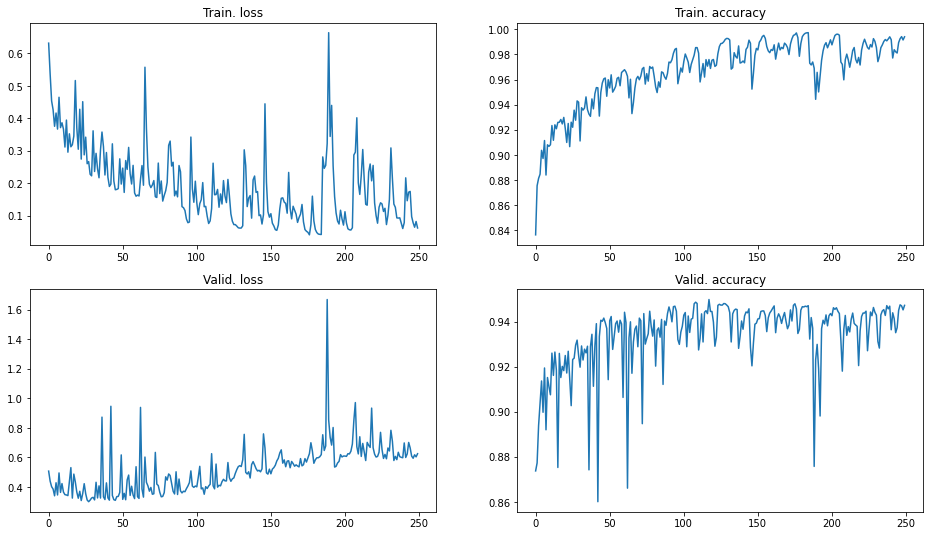

In [21]:
print(history.history.keys())
fig, axs = plt.subplots(2, 2, figsize=(16,9))
axs[0,0].plot(history.history["loss"])
axs[0,0].set_title("Train. loss")
axs[0,1].plot(history.history["accuracy"])
axs[0,1].set_title("Train. accuracy")
axs[1,0].plot(history.history["val_loss"])
axs[1,0].set_title("Valid. loss")
axs[1,1].plot(history.history["val_accuracy"])
axs[1,1].set_title("Valid. accuracy")
plt.show()

In [22]:
X_train, y_train = load_data(train_path)

in_dim = 48*2
hide_dim_1 = in_dim*3/2
hide_dim_2 = hide_dim_1*2/3
out_dim = 2


model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(in_dim, input_dim=48, activation="relu"),
  tf.keras.layers.Dense(hide_dim_1 ,activation='relu'),
  tf.keras.layers.Dense(hide_dim_2 ,activation='relu'),
  tf.keras.layers.Dense(out_dim)
])

model.compile(
    optimizer="Adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=250
)

X shape:  (34000, 48) 
 y shape:  (34000, 2)
Epoch 1/250
532/532 [==============================] - 1s 2ms/step - loss: 0.6170 - accuracy: 0.8388
Epoch 2/250
532/532 [==============================] - 1s 2ms/step - loss: 0.5082 - accuracy: 0.8765
Epoch 3/250
532/532 [==============================] - 1s 2ms/step - loss: 0.4477 - accuracy: 0.8951
Epoch 4/250
532/532 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.9054
Epoch 5/250
532/532 [==============================] - 1s 2ms/step - loss: 0.4399 - accuracy: 0.8981
Epoch 6/250
532/532 [==============================] - 1s 2ms/step - loss: 0.3410 - accuracy: 0.9164
Epoch 7/250
532/532 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.9005
Epoch 8/250
532/532 [==============================] - 1s 2ms/step - loss: 0.3560 - accuracy: 0.9082
Epoch 9/250
532/532 [==============================] - 1s 2ms/step - loss: 0.3146 - accuracy: 0.9235
Epoch 10/250
532/532 [========================

Epoch 81/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1904 - accuracy: 0.9579
Epoch 82/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1940 - accuracy: 0.9614
Epoch 83/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1490 - accuracy: 0.9638
Epoch 84/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1431 - accuracy: 0.9682
Epoch 85/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1135 - accuracy: 0.9744
Epoch 86/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1573 - accuracy: 0.9684
Epoch 87/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1588 - accuracy: 0.9659
Epoch 88/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1337 - accuracy: 0.9674
Epoch 89/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1062 - accuracy: 0.9741
Epoch 90/250
532/532 [==============================] - 1s 2ms/step - loss: 0.0957

532/532 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.9832
Epoch 161/250
532/532 [==============================] - 1s 2ms/step - loss: 0.2283 - accuracy: 0.9545
Epoch 162/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1452 - accuracy: 0.9729
Epoch 163/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1109 - accuracy: 0.9796
Epoch 164/250
532/532 [==============================] - 1s 2ms/step - loss: 0.0963 - accuracy: 0.9838
Epoch 165/250
532/532 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9851
Epoch 166/250
532/532 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9865
Epoch 167/250
532/532 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.9886
Epoch 168/250
532/532 [==============================] - 1s 2ms/step - loss: 0.0624 - accuracy: 0.9915
Epoch 169/250
532/532 [==============================] - 1s 2ms/step - loss: 0.0865 - a

532/532 [==============================] - 1s 2ms/step - loss: 0.0430 - accuracy: 0.9953
Epoch 240/250
532/532 [==============================] - 1s 2ms/step - loss: 0.0392 - accuracy: 0.9967
Epoch 241/250
532/532 [==============================] - 1s 2ms/step - loss: 0.0381 - accuracy: 0.9966
Epoch 242/250
532/532 [==============================] - 1s 2ms/step - loss: 0.0402 - accuracy: 0.9964
Epoch 243/250
532/532 [==============================] - 1s 2ms/step - loss: 0.4343 - accuracy: 0.9632
Epoch 244/250
532/532 [==============================] - 1s 2ms/step - loss: 0.2445 - accuracy: 0.9717
Epoch 245/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1767 - accuracy: 0.9711
Epoch 246/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1267 - accuracy: 0.9778
Epoch 247/250
532/532 [==============================] - 1s 2ms/step - loss: 0.2092 - accuracy: 0.9727
Epoch 248/250
532/532 [==============================] - 1s 2ms/step - loss: 0.1439 - a

Text(0.5, 1.0, 'Train. accuracy')

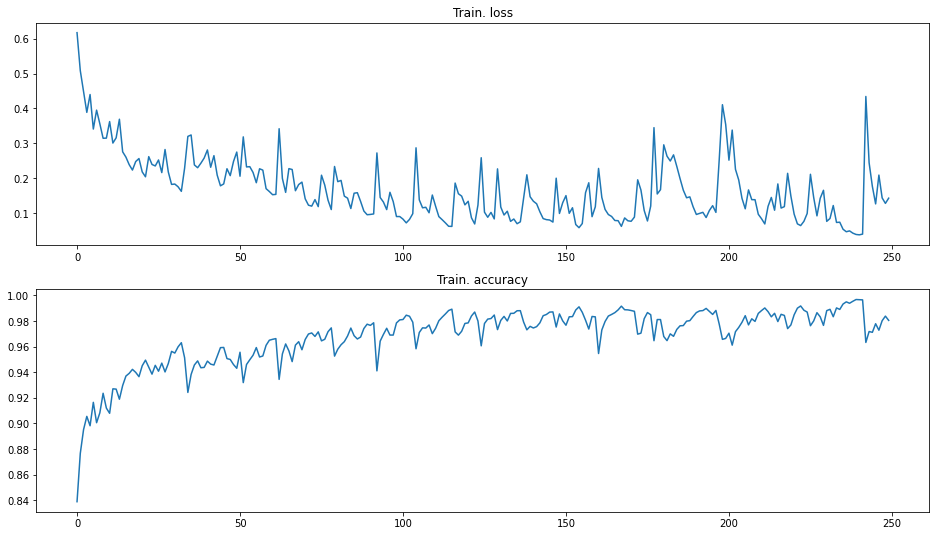

In [23]:
fig, axs = plt.subplots(2, figsize=(16,9))
axs[0].plot(history.history["loss"])
axs[0].set_title("Train. loss")
axs[1].plot(history.history["accuracy"])
axs[1].set_title("Train. accuracy")

In [24]:
X_test, y_test = load_data(test_path)
model.evaluate(X_test, y_test)

X shape:  (6000, 48) 
 y shape:  (6000, 2)
188/188 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.9502


[0.44815486669540405, 0.950166642665863]

## Prova con dati "inventati"
Proviamo a predire l'esito di una battaglia scegliendo noi i Pokémon che combatteranno

In [25]:
pokemons = pd.read_csv(pokemons_path)
def get_pokemon_match(name_first, name_second):
    id_first = pokemons.loc[pokemons.Name == name_first].iloc[0]["#"]
    id_second = pokemons.loc[pokemons.Name == name_second].iloc[0]["#"]
    new_id = str(id_first) + "-" + str(id_second)
    match = cross_pokemon_data.loc[cross_pokemon_data.id == new_id]
    match = match[total_features].values
    return match

def get_winner(name_first, name_second):
    match = get_pokemon_match(name_first, name_second)
    winner = model.predict(match)
    trust = float(np.absolute(np.diff(winner)))
    winner_idx = np.argmax(winner)
    if winner_idx == 0:
        winner_name = name_first
    else:
        winner_name = name_second
    return winner_name, trust

Match scontato: Mewtwo vs Pidgey. Ci aspettiamo che Mewtwo, il _Pokémon più potente_ vinca contro un piccolo uccellino del Percorso 1

In [26]:
get_winner("Pidgey", "Mewtwo")

('Mewtwo', 13.060327529907227)